In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("lis.csv")

In [3]:
data.head()

id                                               name    host_id  \
0  11873169.0                     Vaudoise Alpes spacious Chalet   63304445   
1  13849721.0                      logement en Campagne Vaudoise   80884869   
2  17266815.0  Chambre paisible à Bex (dans le Chablais vaudo...  113682114   
3  18383837.0               Coin de paradis dans village vaudois  127327671   
4  22998984.0    Daphne 11B, Swiss Alps, Villars sur Ollon, Vaud  170584281   

   host_name neighbourhood_group   neighbourhood  latitude  longitude  \
0     Pascal               Aigle  Ormont-Dessous  46.36467    7.05934   
1      Raoul         Lavaux-Oron  Jorat-Mézières  46.60296    6.78429   
2  Françoise               Aigle             Bex  46.24759    7.02406   
3    Marlene                Nyon        Duillier  46.41327    6.23437   
4    Kiriaki               Aigle           Ollon  46.29811    7.05586   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt  300.0               3                 39   2/10/2024   
1     Private room   80.0               5                  0         NaN   
2     Private room    NaN               1                  0         NaN   
3     Private room  100.0               3                 25   10/1/2023   
4  Entire home/apt  236.0               3                 59   2/29/2024   

   reviews_per_month  calculated_host_listings_count  availability_365  \
0               0.52                               1                 9   
1                NaN                               2                89   
2                NaN                               1                 0   
3               0.31                               1               359   
4               0.80                               1               358   

   number_of_reviews_ltm  license  
0                      8      NaN  
1                      0      NaN  
2                      0      NaN  
3                      4      NaN  
4                     10      NaN

In [4]:
data.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                          0
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              4
minimum_nights                     0
number_of_reviews                  0
last_review                        6
reviews_per_month                  6
calculated_host_listings_count     0
availability_365                   0
number_of_reviews_ltm              0
license                           20
dtype: int64

In [5]:
data_cleaned = data.dropna(subset=['price', 'license', 'last_review', 'reviews_per_month'])


In [7]:
data_cleaned['price'] = pd.to_numeric(data_cleaned['price'], errors='coerce')


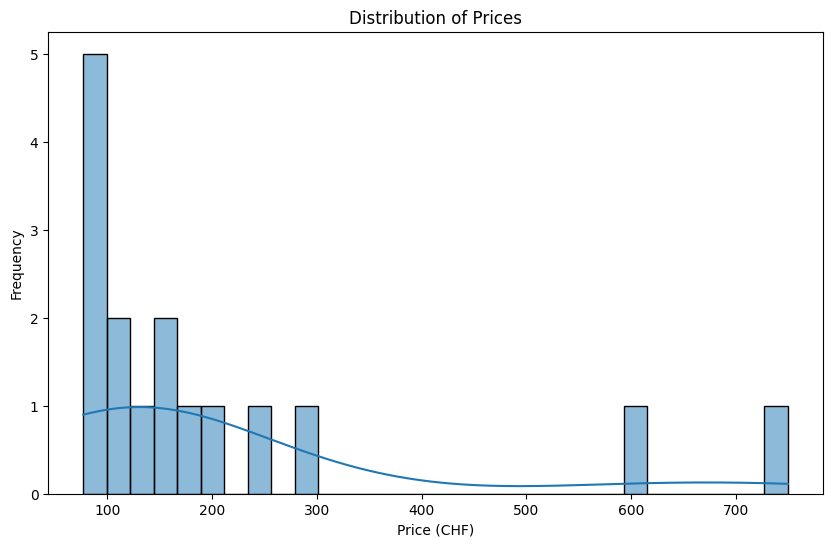

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price (CHF)')
plt.ylabel('Frequency')
plt.show()


In [10]:
#room type analysis

room_type_counts = data['room_type'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values)
plt.title('Room Type Distribution')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()


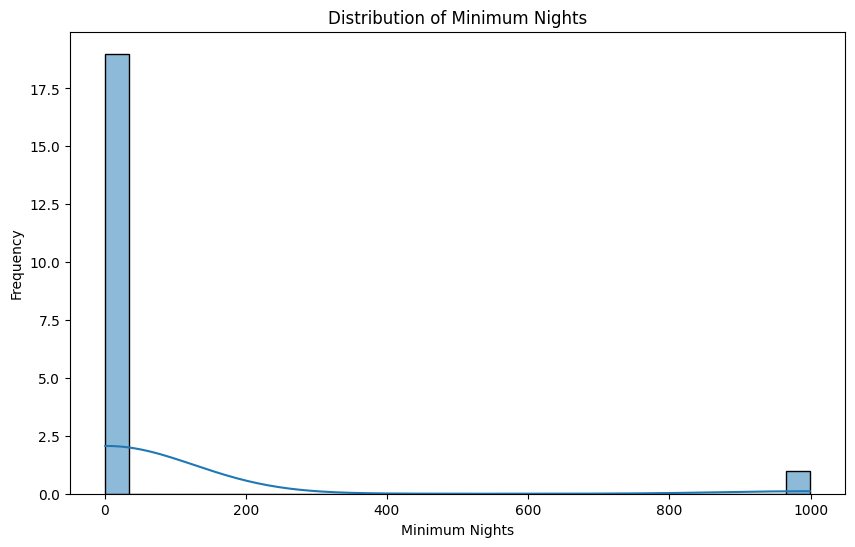

In [12]:
# Minimum Nights Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['minimum_nights'], bins=30, kde=True)
plt.title('Distribution of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.ylabel('Frequency')
plt.show()

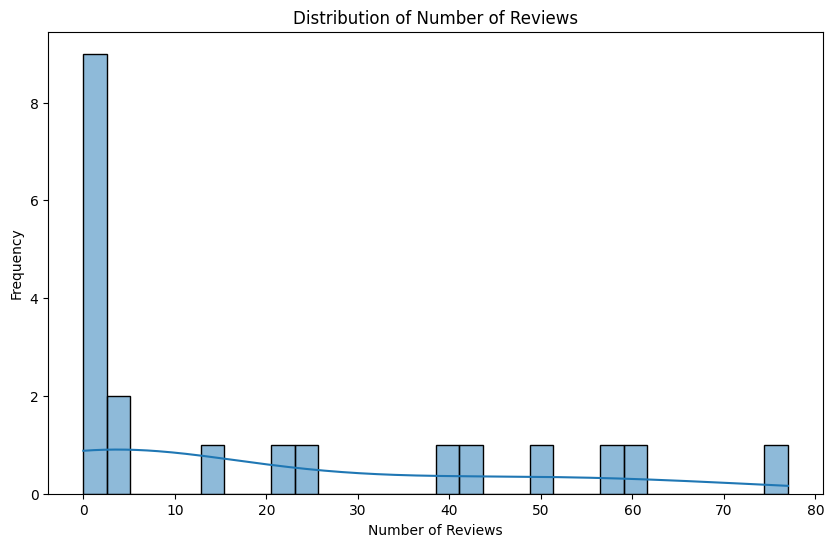

In [14]:
# Number of Reviews Analysis
plt.figure(figsize=(10, 6))
sns.histplot(data['number_of_reviews'], bins=30, kde=True)
plt.title('Distribution of Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Frequency')
plt.show()

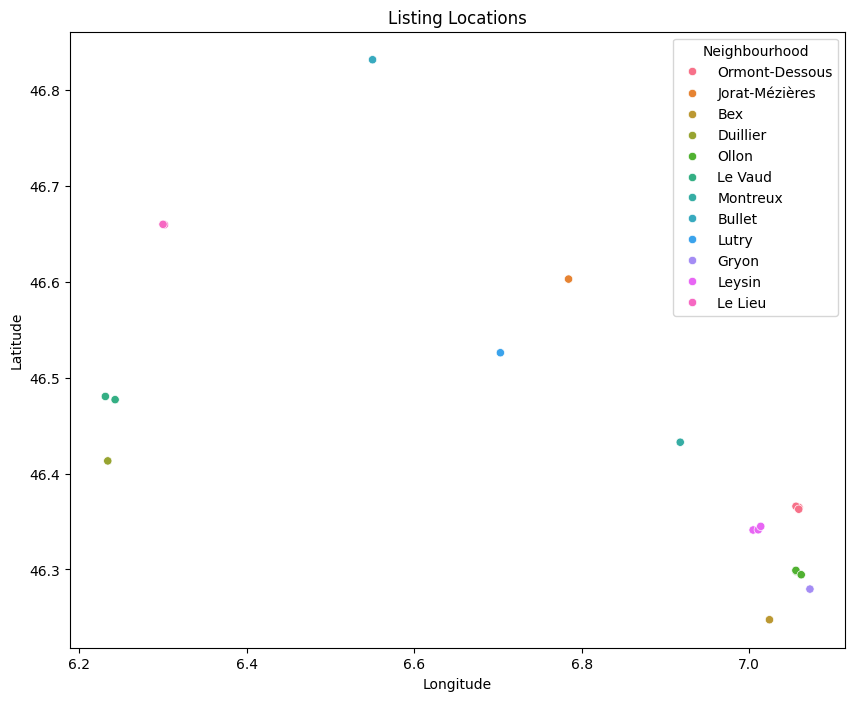

In [16]:
# Location Analysis (using latitude and longitude)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood', data=data)
plt.title('Listing Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood')
plt.show()

In [17]:
pip install plotly geopandas


In [23]:
import plotly.express as px
from shapely.geometry import Point
import geopandas as gpd


In [24]:
# Room Type Analysis using Plotly
room_type_counts = data['room_type'].value_counts()
room_type_fig = px.bar(room_type_counts, x=room_type_counts.index, y=room_type_counts.values,
                        labels={'x': 'Room Type', 'y': 'Count'}, title='Room Type Distribution')
room_type_fig.show()


In [25]:
gdf = gpd.GeoDataFrame(data, geometry=gpd.points_from_xy(data.longitude, data.latitude))


In [26]:
# Load a world map for background
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<ipython-input-26-2d45cdf3b4e1>:2: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



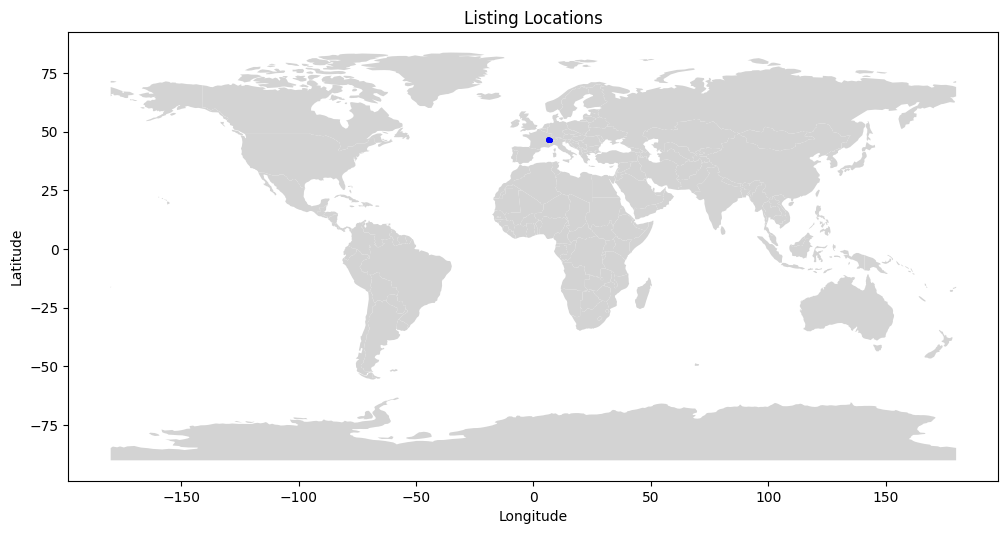

In [27]:
# Plot listings on the map
fig, ax = plt.subplots(figsize=(12, 8))
world.plot(ax=ax, color='lightgray')
gdf.plot(ax=ax, color='blue', markersize=5)
plt.title('Listing Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [30]:
data.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license'],
      dtype='object')

In [32]:
# Cancellation Policies Analysis
avail_counts = data['availability_365'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=avail_counts.index, y=avail_counts.values)
plt.title('Avail Policy Distribution')
plt.xlabel('Avail Policy')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [35]:
# Review Scores Analysis (if available in the dataset)
if 'number_of_reviews_ltm' in data.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data['number_of_reviews_ltm'], bins=30, kde=True)
    plt.title('Distribution of Review Scores')
    plt.xlabel('Review Scores')
    plt.ylabel('Frequency')
    plt.show()


In [36]:
# Reviews per Month Analysis
plt.figure(figsize=(10, 6))
sns.distplot(data['reviews_per_month'], bins=30, kde=True, rug=True,
             hist_kws={'edgecolor': 'black'}, kde_kws={'linewidth': 2})
plt.title('Distribution of Reviews per Month')
plt.xlabel('Reviews per Month')
plt.ylabel('Density')
plt.grid(True)
plt.show()

<ipython-input-36-6ef79389bbb9>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


